In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *

AttributeError: 'function' object has no attribute 'Image'

In [2]:
# import ipywidgets
# import ipyvuetify as v
# from threading import Timer

# lorum_ipsum = 'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.'

In [3]:
# count = 0

# def on_click(widget, event, data):
#     global count
#     count += 1
#     button1.children=['button ' + str(count)]

# button1 = v.Btn(children=['button'])
# button1.on_event('click', on_click)

# v.Layout(class_='pa-2', children=[button1])

Layout(children=[Btn(children=['button'])], class_='pa-2')

In [4]:
# v.Layout(children=[
#     v.Btn(color='primary', class_='ma-2', children=['primary']),
#     v.Btn(color='error', class_='ma-2', children=['error']),
#     v.Btn(color='pink lighten-4', class_='ma-2', children=['custom']),
#     v.Btn(color='#654321', dark=True, class_='ma-2', children=['hex']),
#     v.Btn(color='#654321', disabled=True, class_='ma-2', children=['disabled']),

# ])

Layout(children=[Btn(children=['primary'], class_='ma-2', color='primary'), Btn(children=['error'], class_='ma…

In [6]:
# dialog = v.Dialog(width='500',
#     v_slots=[{
#         'name': 'activator',
#         'variable': 'x',
#         'children': v.Btn(v_on='x.on', color='success', dark=True, children=[
#             'Open dialog'
#         ]),
#     }], 
#     children=[
#         v.Card(children=[
#             v.CardTitle(class_='headline gray lighten-2', primary_title=True, children=[
#                 "Lorem ipsum"
#             ]),
#             v.CardText(children=[
#                 lorum_ipsum,
#                 v.TextField(label='Label', placeholder='Placeholder')
#             ]),
#     ])
# ])

# v.Layout(children=[dialog])

Layout(children=[Dialog(children=[Card(children=[CardTitle(children=['Lorem ipsum'], class_='headline gray lig…

In [8]:
path = Path()

In [13]:
import re
def wh_room(x): 
    if re.search("bath", x):
        return 'bathroom'
    elif re.search("living", x):
        return 'living room'
    elif re.search("kitchen", x):
        return 'kitchen'
    elif re.search("din", x):
        return 'dining room'
    elif re.search("bed", x):
        return 'bedroom'
    else:
        return 'unknown'

learn_inf = load_learner(path/'trained_model2.pkl', cpu=True)

NotImplementedError: cannot instantiate 'PosixPath' on your system

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
out_pl = widgets.Output()

In [ ]:
lbl_pred = widgets.Label()

In [ ]:
def on_click(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(512,512))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [ ]:
btn_upload.observe(on_click,names=['data'])

In [ ]:
desLbl = widgets.Label('What is this room ?')

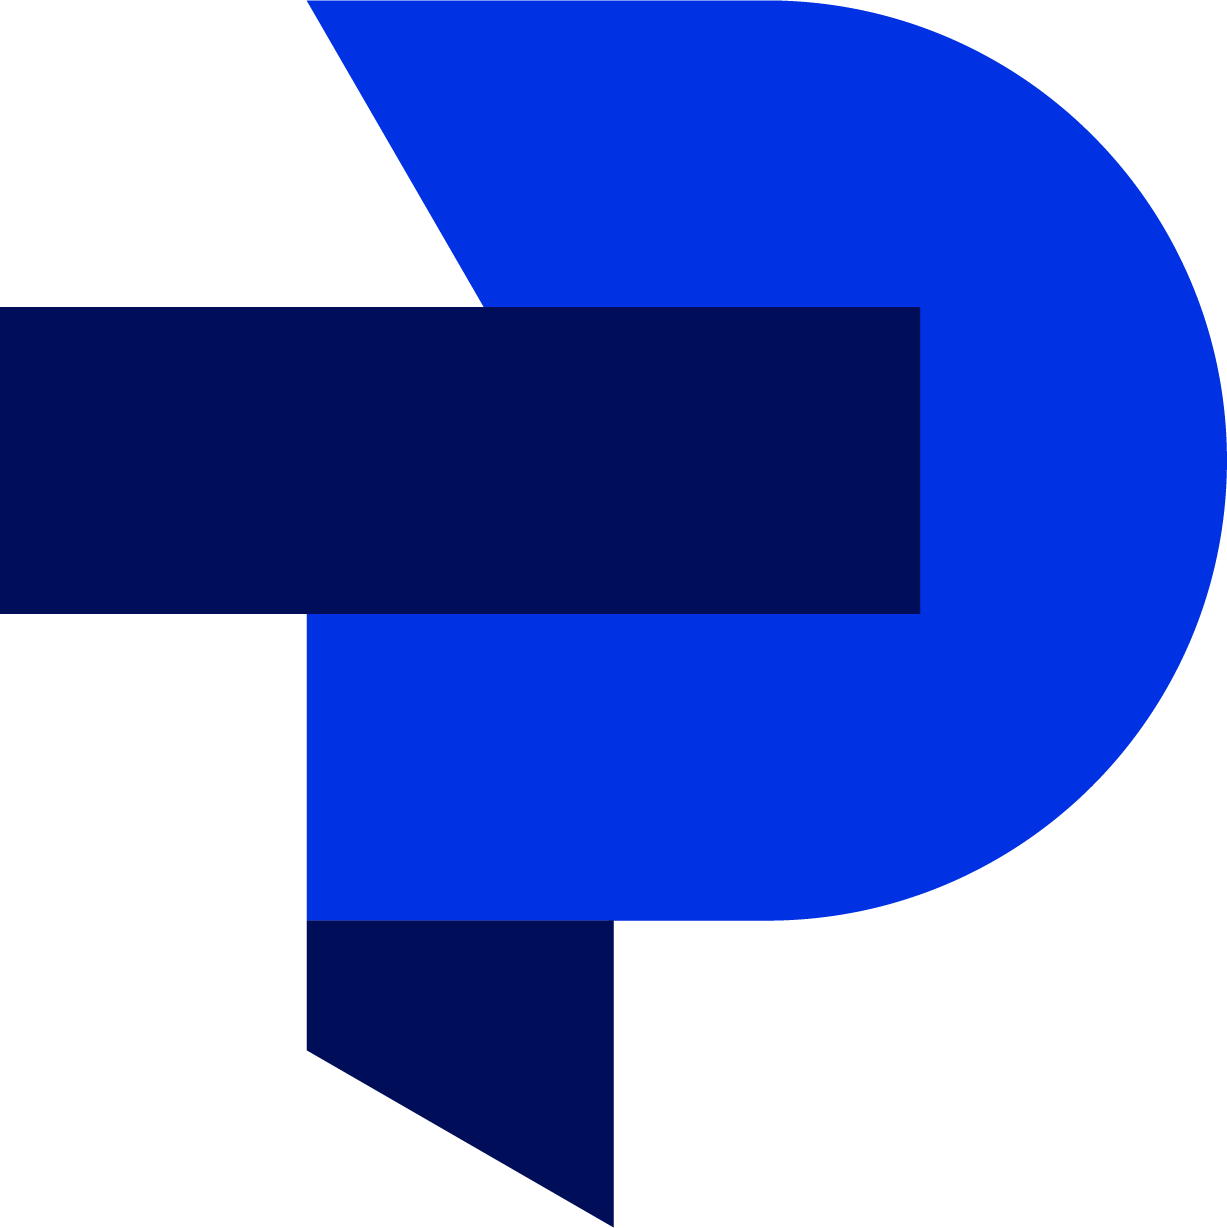

In [14]:
from IPython import display
display.Image("./log.png")

Brand your professional real-estate solution today
Your own branded Portal Increases your brand awareness and allows you to reach thousands of potential leads. Don’t waste time and risk your business trying to meet these requirements on your own. Let PropTexx do the hard work for you..
***

In [ ]:
display(VBox([desLbl, 
      btn_upload, out_pl, lbl_pred]))